# Importing basic libraries and defining functions

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from timeit import default_timer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV



In [ ]:
def score(classifier,X_train,y_train,X_test,y_test):
        start = default_timer()
        print("Results for training set:")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=1)
        print('CV accuracy scores: %s' % scores)
        print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
        print("\nResults for testing set:")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
        end = default_timer()
        print(end - start)

# EDA

In [2]:
df = pd.read_csv('mushrooms.csv')

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
for x in df.columns:
    print(x)
    print(df[x].value_counts(),"\n")

class
e    4208
p    3916
Name: class, dtype: int64 

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 

bruises
f    4748
t    3376
Name: bruises, dtype: int64 

odor
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64 

gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64 

gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64 

gill-size
b    5612
n    2512
Name: gill-size, dtype: int64 

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64 

stalk-shape
t    4608
e    3516
Name: stalk-shape, dtype: int64 

st

It's worth noticing that even at this early stage of the project two of the features may already seem interesting for us. Firstly, the **veil-type** feature has only one value *'p'* for all the data points. It is clear that it will not affect our model anyhow, so the column should be simply dropped. 

In [ ]:
df.drop(['veil-type'], axis=1, inplace=True)

Second thing that is worth noticing is the *'?'* value in the **stalk-root** feature. Unlike the other values it is not a letter, but it's not a null value either. Taking into consideration the number of observations having this particular value (2480) dropping all of them or dropping the feature might turn out harmful for the performance of our models. To determine that we can investigate our dataset divided into two subsets: the first one, where df['stalk-root']==? and the second one, where df['stalk-root']!=?. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


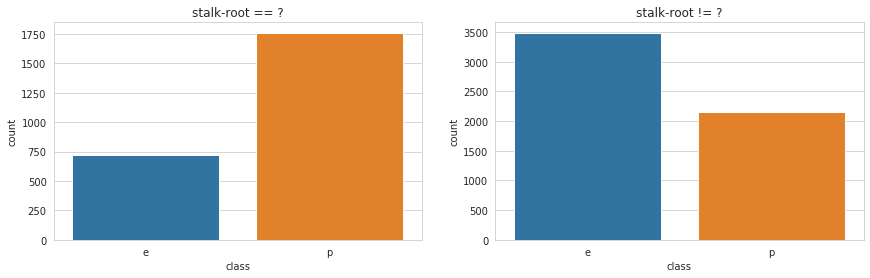

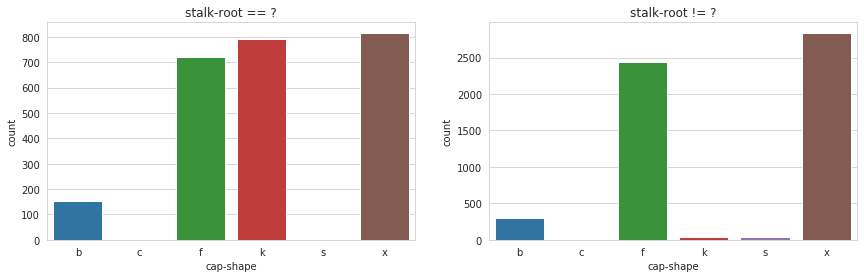

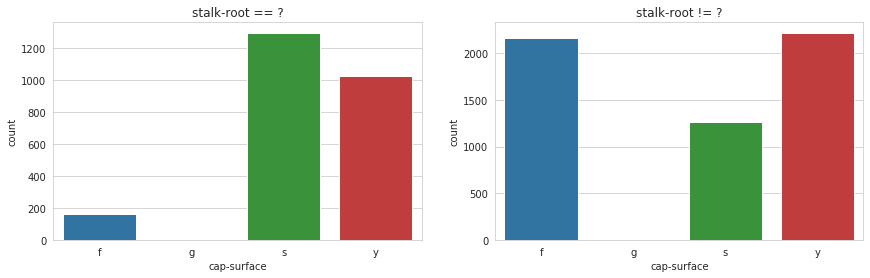

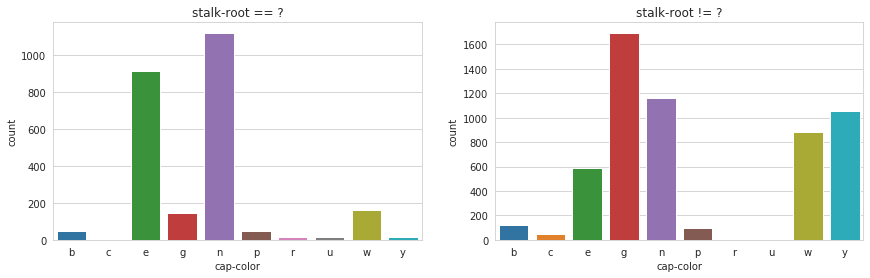

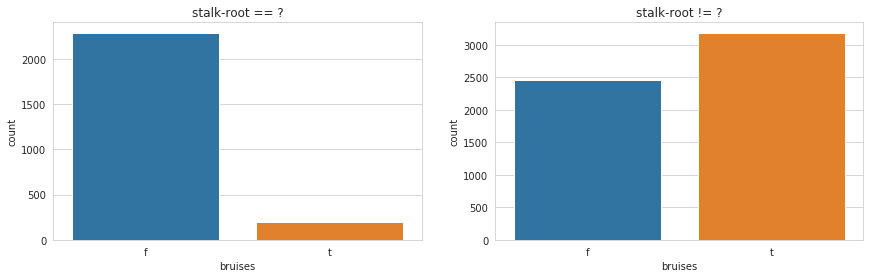

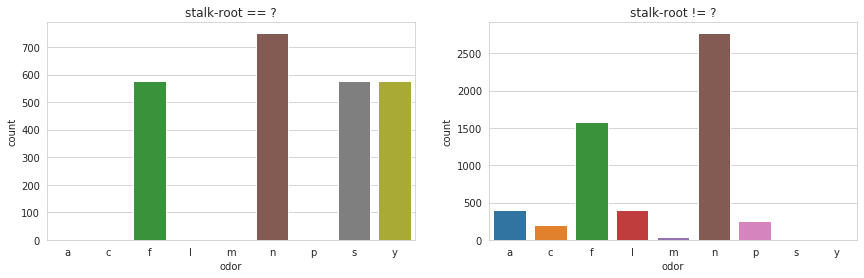

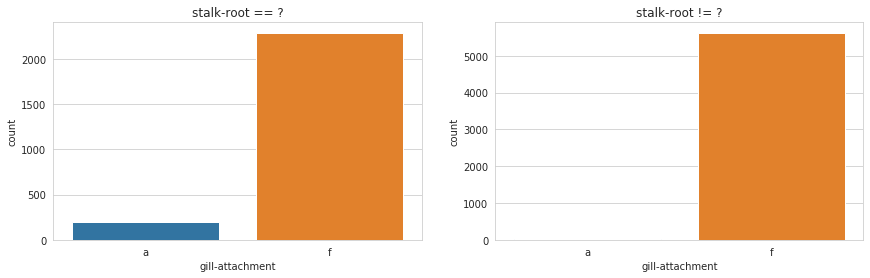

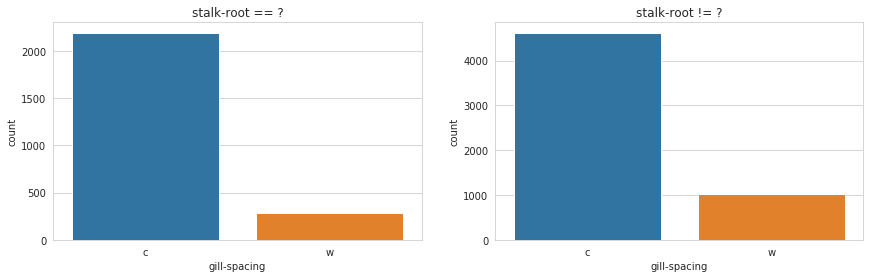

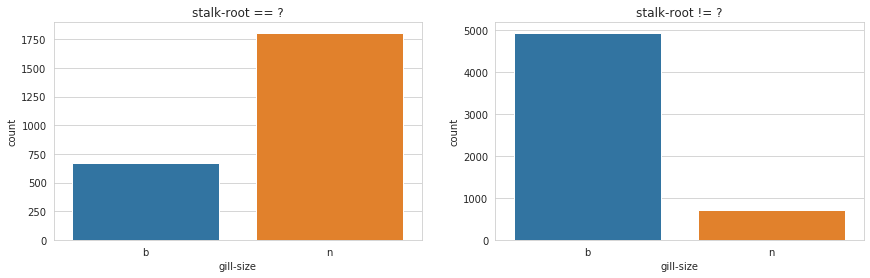

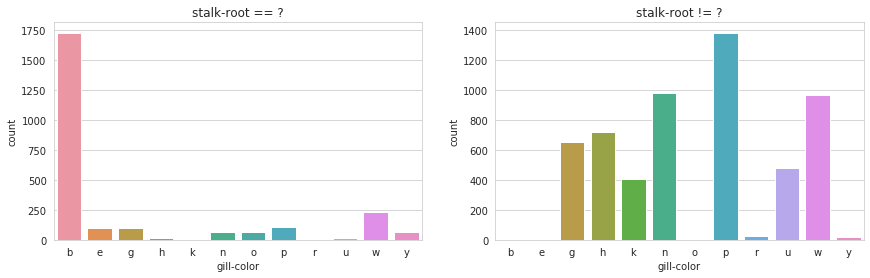

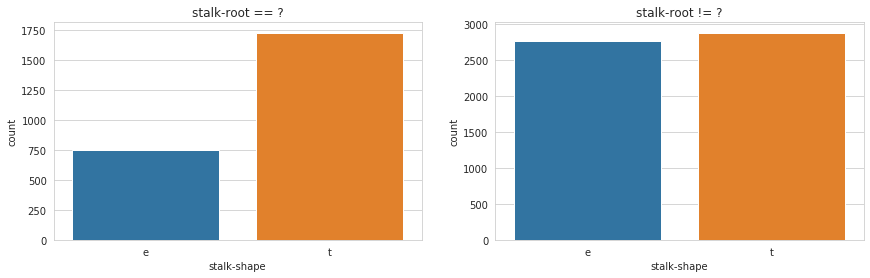

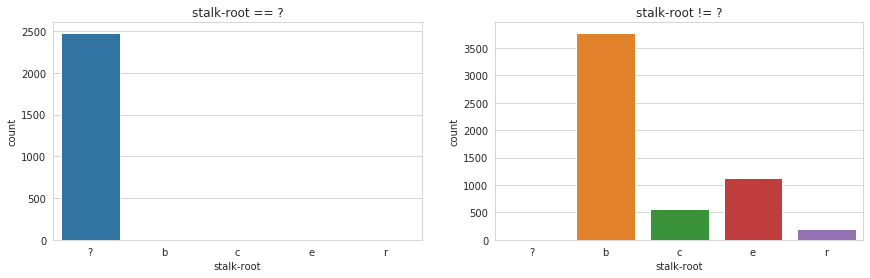

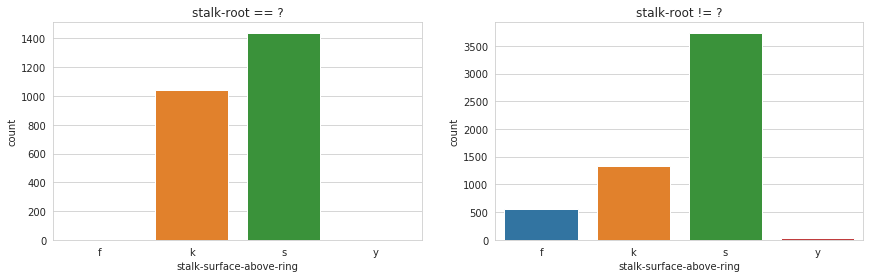

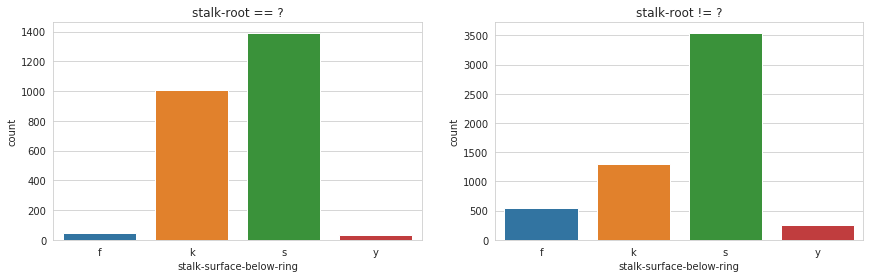

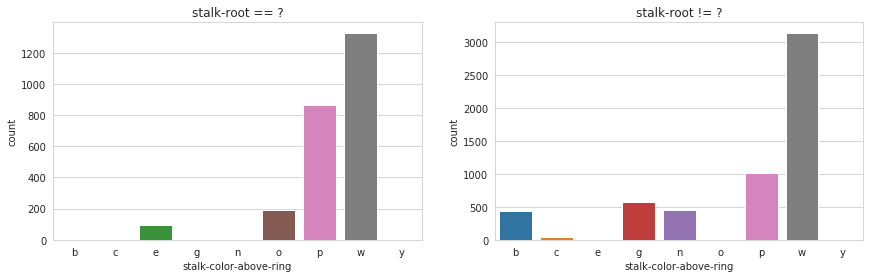

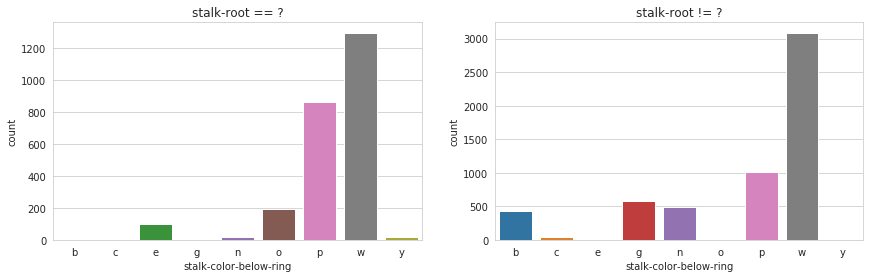

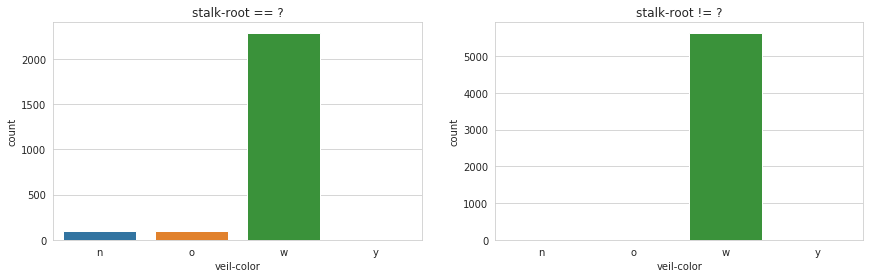

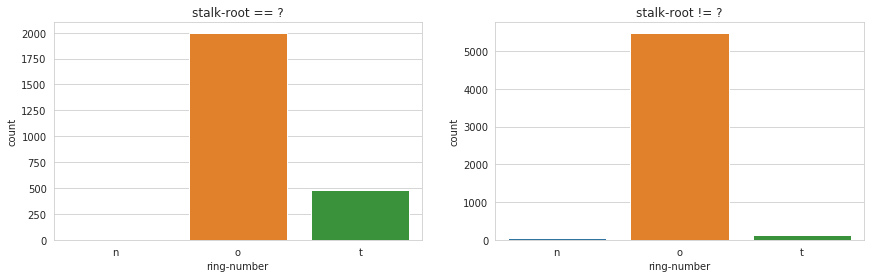

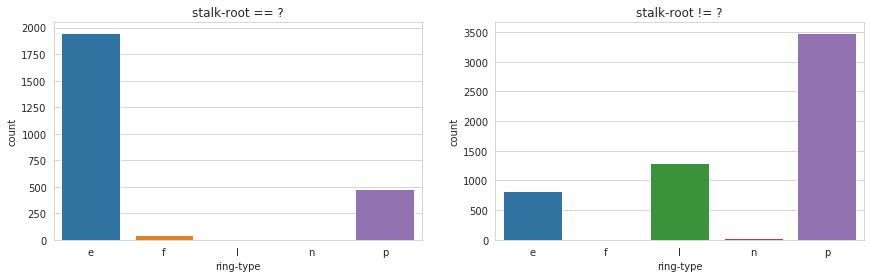

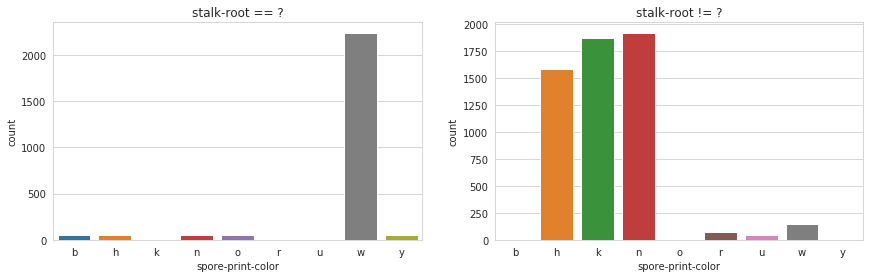

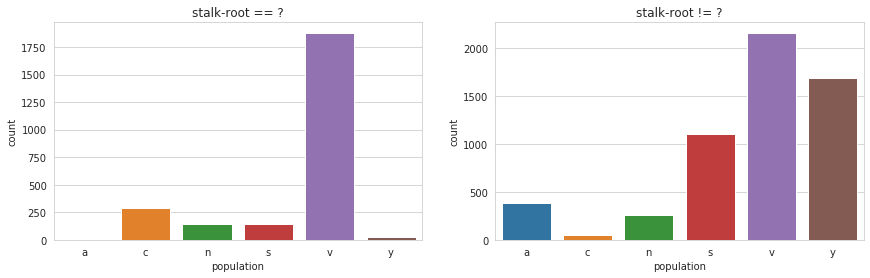

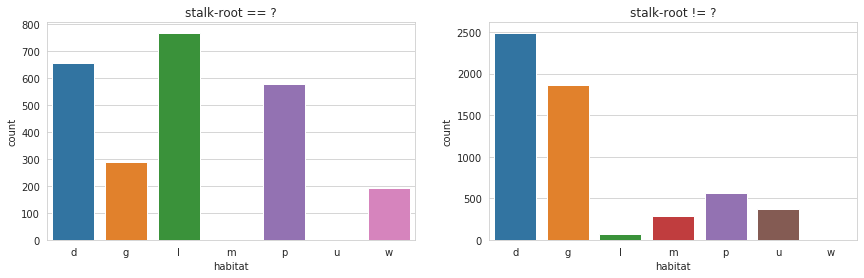

In [ ]:
sns.set_style(style='whitegrid')
for ft in df.columns:
    #Format subplots
    fig, ax = plt.subplots(1,2)
    plt.subplots_adjust(right=2)
    
    #Construct values to count in each column
    a=set(df[df['stalk-root']=='?'][ft]) # unordered set of unique values from x column
    b=set(df[df['stalk-root']!='?'][ft])
    c = a.union(b) # union of sets
    c = np.sort(np.array(list(c))) 
    
    #Build each subplot
    sns.countplot(x=df[df['stalk-root']=='?'][ft], order=c, ax=ax[0]).set_title('stalk-root == ?')
    sns.countplot(x=df[df['stalk-root']!='?'][ft], order=c, ax=ax[1]).set_title('stalk-root != ?')
    
    #Plot the plots
    fig.show()

Having analyzed the distribution of each feature within those two data sets we can conclude that they vary greatly for each feature. Therefore, the fact that the stalk-root's are missing for some of the mushrooms and not missing for the others may indeed be a useful information and indicate that the *'?'* value should be treated as a separate category.

# Data encoding

In [ ]:
df_ohe = df.copy()
LE = LabelEncoder() # in that case it's better, because it transforms the data frame, unlike .OneHotEncoder whose output is some matrix
for column in df_ohe.columns:
    df_ohe[column] = LE.fit_transform(df_ohe[column])
df_ohe=pd.get_dummies(df_ohe,columns=df_ohe.columns,drop_first=True) # LE transforms classes to numerical values, so we have to create dummy variables to have one hot encoded data
df_ohe.head()

,class_1,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,cap-color_3,cap-color_4,cap-color_5,cap-color_6,cap-color_7,cap-color_8,cap-color_9,bruises_1,odor_1,odor_2,odor_3,odor_4,odor_5,odor_6,odor_7,odor_8,gill-attachment_1,gill-spacing_1,gill-size_1,gill-color_1,gill-color_2,gill-color_3,gill-color_4,gill-color_5,gill-color_6,gill-color_7,gill-color_8,gill-color_9,gill-color_10,...,stalk-color-above-ring_5,stalk-color-above-ring_6,stalk-color-above-ring_7,stalk-color-above-ring_8,stalk-color-below-ring_1,stalk-color-below-ring_2,stalk-color-below-ring_3,stalk-color-below-ring_4,stalk-color-below-ring_5,stalk-color-below-ring_6,stalk-color-below-ring_7,stalk-color-below-ring_8,veil-color_1,veil-color_2,veil-color_3,ring-number_1,ring-number_2,ring-type_1,ring-type_2,ring-type_3,ring-type_4,spore-print-color_1,spore-print-color_2,spore-print-color_3,spore-print-color_4,spore-print-color_5,spore-print-color_6,spore-print-color_7,spore-print-color_8,population_1,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
LE = LabelEncoder()
for column in df.columns:
  df[column] = LE.fit_transform(df[column])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']
X_ohe = df_ohe.drop(['class_1'], axis=1)
y_ohe = df_ohe['class_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.2)

0 is 'poisonous' and 1 is 'edible', so the confusion matrices that we'll be computing later will be in the following form: 
\begin{bmatrix}
\text{P predicted as P} & \text{P predicted as E}\\
\text{E predicted as P} & \text{E predicted as E}
\end{bmatrix}

# Decision Tree

In [ ]:
tree_ = DecisionTreeClassifier(criterion='gini',random_state=101) # it basically doesn't matter whether we use gini or entropy. However, entropy takes slightly more computation time than gini because of the log calculation
tree_.fit(X_train,y_train)
score(tree_, X_train, y_train, X_test, y_test)

Results for training set:
Accuracy Score: 1.0000

Confusion Matrix:
[[3384    0]
 [   0 3115]]

CV accuracy scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV accuracy: 1.000 +/- 0.000

Results for testing set:
Accuracy Score: 1.0000

Confusion Matrix:
[[824   0]
 [  0 801]]

0.16117713699998149


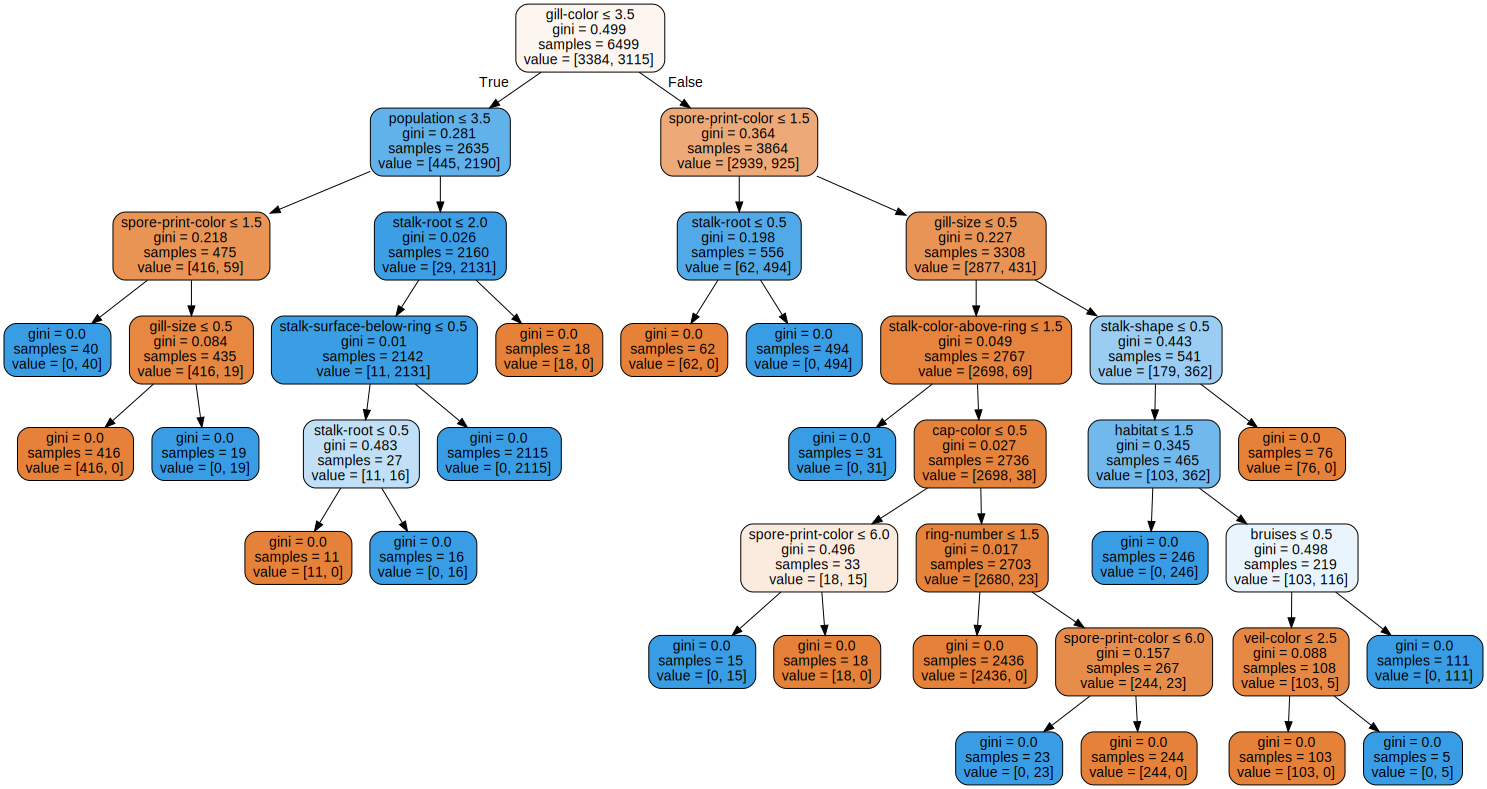

In [ ]:
from sklearn import tree # I don't understand why we don't have to one hot encode these numerical values if it still uses the numerical values as actual ordinal values
>>> import graphviz 
>>> dot_data = tree.export_graphviz(tree_, out_file=None) 
>>> graph = graphviz.Source(dot_data) 
>>> graph.render("mushrooms") 

>>> dot_data = tree.export_graphviz(tree_, out_file=None, 
...                      feature_names=X.columns,
...                      filled=True, rounded=True,  
...                      special_characters=True)  
>>> graph = graphviz.Source(dot_data)  
>>> graph 


# Random Forest

In [ ]:
forest = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 101)
forest.fit(X_train, y_train)
score(forest, X_train, y_train, X_test, y_test)

Results for training set:
Accuracy Score: 1.0000

Confusion Matrix:
[[3384    0]
 [   0 3115]]

CV accuracy scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV accuracy: 1.000 +/- 0.000

Results for testing set:
Accuracy Score: 1.0000

Confusion Matrix:
[[824   0]
 [  0 801]]

0.4379377039999781


# KNN

In [ ]:
neighbors = KNN(metric='jaccard', n_jobs=-1) # too long so I'll use dimensionality reduction to decrease computing time; I could try using different metrics for binary features using GridSearch,
                                             # but I couldn't find information about it taking computing time into consideration, so I gave up that idea as the jaccard metric had high accuracy;
                                             # Jaccard distance is computed from one minus the Jaccard coefficient, which is the percentage of nonzero coordinates that differ (N10+N01)/(N11+N10+N01);
                                             # it works only for binary features;
neighbors.fit(X_train_ohe,y_train_ohe)
score(neighbors, X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe)

Results for training set:
Accuracy Score: 1.0000

Confusion Matrix:
[[3394    0]
 [   0 3105]]

CV accuracy scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV accuracy: 1.000 +/- 0.000

Results for testing set:
Accuracy Score: 1.0000

Confusion Matrix:
[[814   0]
 [  0 811]]

45.77020288699998


In [ ]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('jaccard') 
X = [[0,1,2,0], [1,1,1,2]] # does not work for non binary features as we can see
dist.pairwise(X)

array([[0. , 0.5],
       [0.5, 0. ]])

In [ ]:
neighbors_ = KNN(metric='hamming', n_jobs=-1) # not sure if it's correct; need to verify whether the metric is appropriate
                                   # Hamming  distance is  the  percentage  of coordinates that differ N_inequal/N_all
neighbors_.fit(X_train,y_train)
score(neighbors_, X_train, y_train, X_test, y_test)

Results for training set:
Accuracy Score: 1.0000

Confusion Matrix:
[[3384    0]
 [   0 3115]]

CV accuracy scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV accuracy: 1.000 +/- 0.000

Results for testing set:
Accuracy Score: 1.0000

Confusion Matrix:
[[824   0]
 [  0 801]]

7.605768021000017


In [ ]:
dist = DistanceMetric.get_metric('hamming') 
X = [[0,1,2,0], [1,1,1,2]] # works for non binary features
dist.pairwise(X)

array([[0.  , 0.75],
       [0.75, 0.  ]])

# Logistic Regression

In [ ]:
log_reg = LogisticRegression(solver='lbfgs') # solver is an algorithm used in optimization the cost function
log_reg.fit(X_train_ohe,y_train_ohe)
score(log_reg, X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe)

Results for training set:
Accuracy Score: 1.0000

Confusion Matrix:
[[3394    0]
 [   0 3105]]

CV accuracy scores: [1.         1.         0.99692308 1.         1.         0.99846154
 1.         1.         1.         1.        ]
CV accuracy: 1.000 +/- 0.001

Results for testing set:
Accuracy Score: 1.0000

Confusion Matrix:
[[814   0]
 [  0 811]]

1.3411129170000322


In [ ]:
log_reg_ = LogisticRegression(solver='lbfgs')
log_reg_.fit(X_train,y_train)
score(log_reg_, X_train, y_train, X_test, y_test) # it's wrong approach because the features are not ordinal.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Results for training set:
Accuracy Score: 0.9532

Confusion Matrix:
[[3242  142]
 [ 162 2953]]



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


CV accuracy scores: [0.95846154 0.94615385 0.95230769 0.94       0.95076923 0.94769231
 0.96461538 0.95384615 0.96153846 0.94761171]
CV accuracy: 0.952 +/- 0.007

Results for testing set:
Accuracy Score: 0.9532

Confusion Matrix:
[[790  34]
 [ 42 759]]

1.5889678490000279


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# SVM

In [ ]:
SVM = SVC(random_state=101, gamma='auto') # as default SVM uses rbf kernel; gamma is the kernel coefficient (1/sigma^2) and 'auto' uses 1 / n_features as gamma
SVM.fit(X_train_ohe,y_train_ohe)
score(SVM, X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe)

Results for training set:
Accuracy Score: 0.9965

Confusion Matrix:
[[3394    0]
 [  23 3082]]

CV accuracy scores: [0.99692308 0.99846154 0.99692308 0.99692308 0.99846154 0.99076923
 0.99538462 0.99846154 0.99384615 0.99691834]
CV accuracy: 0.996 +/- 0.002

Results for testing set:
Accuracy Score: 0.9969

Confusion Matrix:
[[814   0]
 [  5 806]]

9.359997006999947


# Determining feature importance (LE) to enhance the DT, RF and KNN (Hamming distance) performances (their computational time)

 1) odor                           0.159596
 2) gill-size                      0.112328
 3) gill-color                     0.107148
 4) spore-print-color              0.100870
 5) ring-type                      0.080512
 6) population                     0.062549
 7) stalk-root                     0.057628
 8) bruises                        0.052510
 9) stalk-surface-above-ring       0.046774
10) gill-spacing                   0.046203
11) stalk-surface-below-ring       0.043709
12) habitat                        0.031425
13) stalk-shape                    0.020278
14) cap-color                      0.015407
15) stalk-color-above-ring         0.014416
16) stalk-color-below-ring         0.014291
17) ring-number                    0.012933
18) cap-surface                    0.010359
19) cap-shape                      0.005135
20) gill-attachment                0.003386
21) veil-color                     0.002543


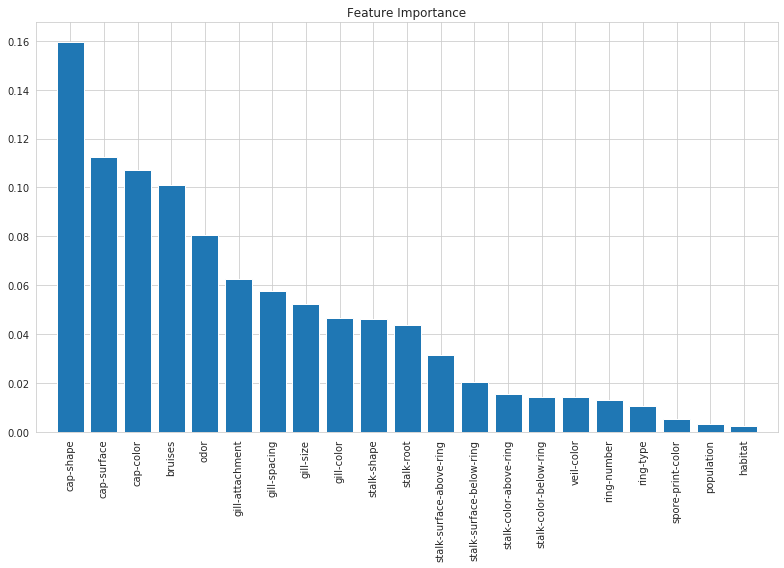

In [ ]:
feat_labels = df.columns.drop('class')
forest_ = RandomForestClassifier(n_estimators=500, random_state=1)
forest_.fit(X_train, y_train)
importances = forest_.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.figure(figsize=(11,8))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
sfm = SelectFromModel(forest_, threshold=0.04, prefit=True) # choosing first 10 features
X_train_fi = sfm.transform(X_train)
X_test_fi = sfm.transform(X_test)

In [ ]:
tree_fi = DecisionTreeClassifier(criterion='gini',random_state=101)
tree_fi.fit(X_train_fi,y_train)
score(tree_fi, X_train_fi, y_train, X_test_fi, y_test)

Results for training set:
Accuracy Score: 1.0000

Confusion Matrix:
[[3359    0]
 [   0 3140]]

CV accuracy scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV accuracy: 1.000 +/- 0.000

Results for testing set:
Accuracy Score: 1.0000

Confusion Matrix:
[[849   0]
 [  0 776]]

0.10663492200001201


We can see that it outperforms the previous DT model when it comes to the computation time, which is 2 times faster, while remaining the same lavel of accuracy.

In [ ]:
forest_fi = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 101)
forest_fi.fit(X_train_fi, y_train)
score(forest_fi, X_train_fi, y_train, X_test_fi, y_test)

Results for training set:
Accuracy Score: 1.0000

Confusion Matrix:
[[3359    0]
 [   0 3140]]

CV accuracy scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV accuracy: 1.000 +/- 0.000

Results for testing set:
Accuracy Score: 1.0000

Confusion Matrix:
[[849   0]
 [  0 776]]

0.38183941700003743


When it comes to the RF classifier, reducing dimensionality did not really enhance the performance computation timewise.

In [ ]:
neighbors_fi = KNN(metric='hamming')
neighbors_fi.fit(X_train_fi,y_train)
score(neighbors_fi, X_train_fi, y_train, X_test_fi, y_test)

Results for training set:
Accuracy Score: 1.0000

Confusion Matrix:
[[3359    0]
 [   0 3140]]

CV accuracy scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV accuracy: 1.000 +/- 0.000

Results for testing set:
Accuracy Score: 1.0000

Confusion Matrix:
[[849   0]
 [  0 776]]

3.639770265999914


Just as the DT classifier, KNN (for LEncoded features with Hamming distance) for the set with reduced dimensionality performed better when it comes to computation time.

# Grid Search (SVM and LR)

SVM

In [ ]:
param_range_SVM = [0.01, 0.1, 1.0, 10.0, 100.0] # C is the regularization parameter. The strength of the regularization is inversely proportional to C
                                                
param_grid_SVM = [{'C': param_range_SVM,'kernel': ['linear']}, 
              #{'C': param_range_SVM,'gamma': param_range_SVM, 'kernel': ['poly']}, 
              #{'C': param_range_SVM,'gamma': param_range_SVM, 'kernel': ['sigmoid']}, these took to long to compute so I gave them up
              {'C': param_range_SVM,'gamma': param_range_SVM, 'kernel': ['rbf']}] #it creates its own validation set within the function
start = default_timer()
GS_SVM = GridSearchCV(estimator=SVC(), param_grid=param_grid_SVM, scoring='accuracy', cv=5, n_jobs=-1) # cv specifies the number of folds in a (Stratified)KFold (stratified is used if the estimator is a classifier, otherwise it's kfold)
GS_SVM.fit(X_train_ohe, y_train_ohe)
end = default_timer()
print(end - start)
print(GS_SVM.best_score_)
print(GS_SVM.best_params_)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


364.30396130200006
1.0
{'C': 1.0, 'kernel': 'linear'}


In [ ]:
SVM = SVC(random_state=101, C=1.0, kernel='linear')
SVM.fit(X_train_ohe,y_train_ohe)
score(SVM, X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe)

Results for training set:
Accuracy Score: 1.0000

Confusion Matrix:
[[3366    0]
 [   0 3133]]

CV accuracy scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV accuracy: 1.000 +/- 0.000

Results for testing set:
Accuracy Score: 1.0000

Confusion Matrix:
[[842   0]
 [  0 783]]

3.0241145529998903


Not only did GridSearch help us enhance the accuracy scores, but also the computation time of the model got shorter.

LR

In [ ]:
param_range_LR = [0.001, 0.01, 0.1, 1.0, 10.0]
param_grid_LR = [{'C': param_range_LR, 'solver': ['liblinear']}, 
                 {'C': param_range_LR, 'penalty': ['l1', 'l2'], 'solver': ['saga']}, 
                 {'C': param_range_LR, 'penalty': ['l2'], 'solver': ['lbfgs']}]
start = default_timer()
GS_LR = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_LR, scoring='accuracy', cv=5, n_jobs=-1)
GS_LR.fit(X_train_ohe, y_train_ohe)
end = default_timer()
print(end - start)
print(GS_LR.best_score_)
print(GS_LR.best_params_)

19.9194964469998
1.0
{'C': 10.0, 'solver': 'liblinear'}


In [ ]:
log_reg = LogisticRegression(solver='liblinear', C=10.0)
log_reg.fit(X_train_ohe,y_train_ohe)
score(log_reg, X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe)

Results for training set:
Accuracy Score: 1.0000

Confusion Matrix:
[[3366    0]
 [   0 3133]]

CV accuracy scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV accuracy: 1.000 +/- 0.000

Results for testing set:
Accuracy Score: 1.0000

Confusion Matrix:
[[842   0]
 [  0 783]]

0.7020596959998784


The same goes for LR classifier.